## Rotation and Skew Custom Transform
#### To be integrated into PyTorch custom transforms for data augmentation

In [11]:
import PIL
from PIL import Image
import random
from math import tan
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# partially from https://stackoverflow.com/questions/19471814/display-multiple-images-in-one-ipython-notebook-cell

def plot_images(images):
    plt.figure(figsize=(10, 10))
    columns = 2
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)

## Rotation

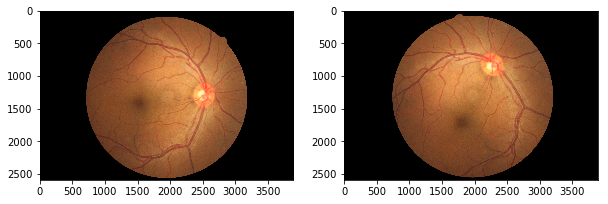

In [9]:
# Rotation Transform
Rotation = lambda x: x.rotate(random.uniform(0,360))

read_path = 'sample/17_right.jpeg'
img1 = PIL.Image.open(read_path)


img2 = PIL.Image.open(read_path)
img2 = Rotation(img2)

plot_images([img1, img2])

## Skew 

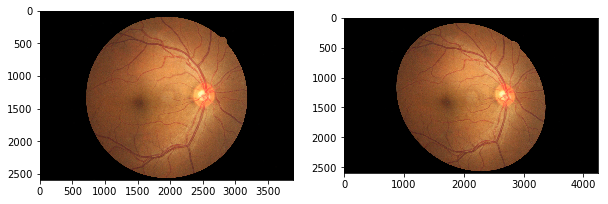

In [17]:
# Skew Transform

Skew = lambda x: skew_image(x, random.uniform(-0.2, 0.2), inc_width=True)
def skew_image(img, angle, inc_width=False):
    """
    Skew image using some math
    :param img: PIL image object
    :param angle: Angle in radians (function doesn't do well outside the range -1 -> 1, but still works)
    :return: PIL image object
    """
    width, height = img.size
    # Get the width that is to be added to the image based on the angle of skew
    xshift = tan(abs(angle)) * height
    new_width = width + int(xshift)

    if new_width < 0:
        return img

    # Apply transform
    img = img.transform(
        (new_width, height),
        Image.AFFINE,
        (1, angle, -xshift if angle > 0 else 0, 0, 1, 0),
        Image.BICUBIC
    )
    
    if (inc_width):
        return img
    else:
        return img.crop((0, 0, width, height))



read_path = 'sample/17_right.jpeg'
img1 = PIL.Image.open(read_path)


img2 = PIL.Image.open(read_path)
img2 = Skew(img2)

plot_images([img1, img2])


### Clean Complete Code 

In [50]:
# imports
from math import tan
from PIL import Image

# Rotation Transform
Rotation = lambda x: x.rotate(random.uniform(0,360))

# Skew Transform
Skew = lambda x: skew_image(x, random.uniform(-0.2, 0.2), inc_width=True)


def skew_image(img, angle, inc_width=False):
    """
    Skew image using some math
    :param img: PIL image object
    :param angle: Angle in radians (function doesn't do well outside the range -1 -> 1, but still works)
    :return: PIL image object
    """
    width, height = img.size
    # Get the width that is to be added to the image based on the angle of skew
    xshift = tan(abs(angle)) * height
    new_width = width + int(xshift)

    if new_width < 0:
        return img

    # Apply transform
    img = img.transform(
        (new_width, height),
        Image.AFFINE,
        (1, angle, -xshift if angle > 0 else 0, 0, 1, 0),
        Image.BICUBIC
    )
    
    if (inc_width):
        return img
    else:
        return img.crop((0, 0, width, height))
